In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\DELL\\Desktop\\pfa\\PS_20174392719_1491204439457_log.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(6362620, 11)

In [8]:
df=df.dropna()

In [9]:
df.shape

(6362620, 11)

# X and y

In [10]:
X=df.drop("isFraud",axis=1)

In [11]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,0


In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
y=df["isFraud"]

In [14]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [15]:
type(y)

pandas.core.series.Series

# Drop columns

In [16]:
X=X.drop(["nameOrig","nameDest"],axis=1)
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,0


In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
df2=pd.get_dummies(X["type"],drop_first=True)
df2

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
6362615,1,0,0,0
6362616,0,0,0,1
6362617,1,0,0,0
6362618,0,0,0,1


In [19]:
X=X.join(df2)
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [20]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [21]:
X=X.drop("type",axis=1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFlaggedFraud  int64  
 7   CASH_OUT        uint8  
 8   DEBIT           uint8  
 9   PAYMENT         uint8  
 10  TRANSFER        uint8  
dtypes: float64(5), int64(2), uint8(4)
memory usage: 541.6 MB


# Feature Selection

## 1. Heatmap

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
feature_df=X.join(y)
feature_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,0


In [25]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


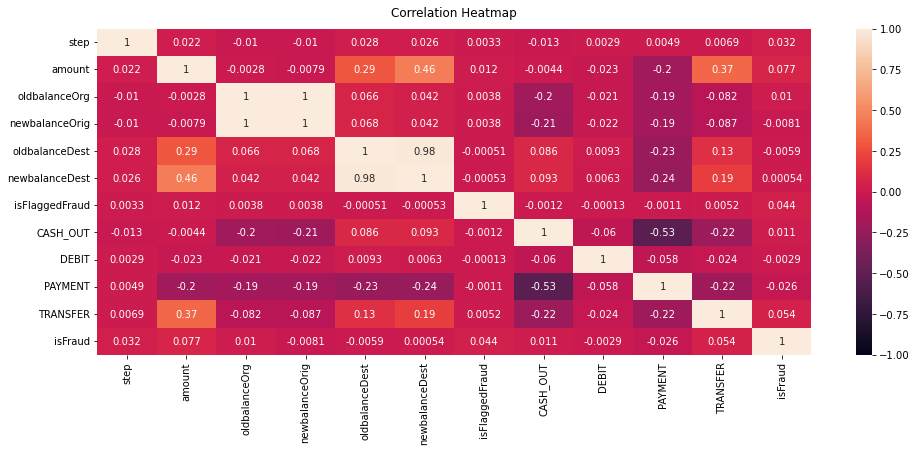

In [25]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(feature_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## 2. Using selection algo

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
X = X  #independent columns
y = y    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs         Score
1           amount  7.586237e+10
2    oldbalanceOrg  6.563092e+09
3   newbalanceOrig  4.223772e+09
4   oldbalanceDest  2.313389e+09
5   newbalanceDest  2.009466e+07
0             step  5.280591e+05
10        TRANSFER  1.691703e+04
6   isFlaggedFraud  1.237922e+04
9          PAYMENT  2.780783e+03
7         CASH_OUT  5.226124e+02


## 3.Feature importance

[1.43757728e-01 2.11135377e-01 3.01869577e-01 6.03110881e-02
 6.49413939e-02 2.03091397e-01 1.45277645e-03 5.86543273e-03
 6.25797292e-06 3.85333018e-04 7.18363832e-03]


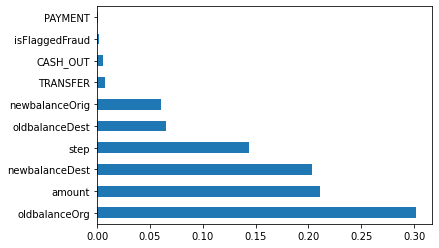

In [27]:
import pandas as pd
import numpy as np
#data = pd.read_csv("D://Blogs//train.csv")
X = X  #independent columns
y = y    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
# we can drop one of these columns because they are so much correlated:
#1.oldbalanceOrg | newbalanceOrig
#2.oldbalanceDest | newbalanceDest

In [28]:
X=X.drop(['oldbalanceOrg','oldbalanceDest'],axis=1)

In [31]:
# we can drop PAYMENT column

In [26]:
X=X.drop(['PAYMENT'],axis=1)

In [27]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0


In [28]:
X.shape

(6362620, 10)

In [ ]:
edddd

# Standardization

In [ ]:
from sklearn import preprocessing

# x_train and y_train

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [31]:
type(X_train)

pandas.core.frame.DataFrame

# randomforest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [39]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

[1]


In [40]:
rfc=RandomForestClassifier(random_state=42)

In [43]:
param_grid = { 
    'n_estimators': [2,3],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [44]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [ ]:
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
best_rfc=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
dataset["type"].value_counts()

In [ ]:
dataset["nameOrig"].value_counts()

In [ ]:
dataset["nameDest"].value_counts()

In [ ]:
dataset_next=dataset.drop(["nameOrig","nameDest"],axis=1)

In [ ]:
dataset_next

In [ ]:
dataset_next.isnull().sum()

In [ ]:
dataset_next.isna().sum()

In [ ]:
dataset_next["isFraud"].value_counts()

In [ ]:
dataset0=dataset_next[dataset_next["isFraud"]==0]

In [ ]:
dataset0=dataset0.head(1142)

In [ ]:
dataset0

In [ ]:
dataset1=dataset_next[dataset_next["isFraud"]==1]

In [ ]:
dataset1

In [ ]:
balDataset=pd.concat([dataset0,dataset1])

In [ ]:
balDataset["isFraud"].value_counts()

In [ ]:
balDataset=pd.get_dummies(balDataset,drop_first=True)

In [ ]:
balDataset

In [ ]:
indep=balDataset.drop(["isFraud"],axis=1)
dep=balDataset["isFraud"]

In [ ]:
indep

In [ ]:
dep

In [ ]:
training_size=round(len(dataset0)*0.80)

In [ ]:
training_size

In [ ]:
train0=dataset0[0:training_size]
test0=dataset0[training_size:]

In [ ]:
train1=dataset1[0:training_size]
test1=dataset1[training_size:]

In [ ]:
train1

In [ ]:
test0

In [ ]:
train=pd.concat([train0,train1])

In [ ]:
test=pd.concat([test0,test1])

In [ ]:
balDataset["isFraud"].value_counts()

In [ ]:
traind=pd.get_dummies(train,drop_first=True)

In [ ]:
testd=pd.get_dummies(test,drop_first=True)

In [ ]:
traind

In [ ]:
testd

In [ ]:
x_train=traind.drop(["isFraud"],axis=1)
y_train=traind[["isFraud"]]

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_test=testd.drop(["isFraud"],axis=1)
y_test=testd[["isFraud"]]

In [ ]:
x_test

In [ ]:
y_test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)

In [ ]:
clf_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)
print(clf_report)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)
print(clf_report)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)
print(clf_report)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
from sklearn.metrics import classification_report
clf_report=classification_report(y_test,y_pred)
print(clf_report)

# Finally

In [ ]:
import pickle
filename='finalized_model_knn.sav'
pickle.dump(classifier,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open(filename,'wb'))

In [ ]:
loaded_model.predict([[12,43,45,576,232,43,34,4,2,2,9]])